# Life Expectany

In [422]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing DATASET

In [423]:
df=pd.read_csv("C:\\Users\lenovo\Desktop\Life Expectancy Data.csv")

In [424]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Sleep hours
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [425]:
df.shape

(2938, 22)

In [426]:
df2=df.filter(['Life expectancy ','Sleep hours'],axis=1)

In [427]:
df2

,Life expectancy,Sleep hours
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5
...,...,...
2933,44.3,9.2
2934,44.5,9.5
2935,44.8,10.0
2936,45.3,9.8


In [428]:
df2.isnull().sum()

Life expectancy      10
Sleep hours         163
dtype: int64

In [429]:
df3=df2.dropna()

In [430]:
df3.isnull().sum()

Life expectancy     0
Sleep hours         0
dtype: int64

In [431]:
df3.head()

,Life expectancy,Sleep hours
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5


# Visualizing the dataset

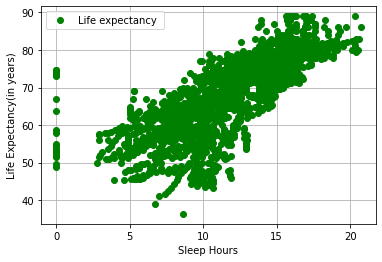

In [432]:
df3.plot(x='Sleep hours',y='Life expectancy ',style='og')
plt.xlabel("Sleep Hours")
plt.ylabel("Life Expectancy(in years)")
plt.grid()
plt.show()

# Train DATA

In [433]:
X=df3.drop("Life expectancy ",axis=1)
y=df3["Life expectancy "]

In [434]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=200)

# Machine Learning MODEL TRAIN

In [435]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

print("Training is completed.")

Training is completed.


# Visualizing the MODEL

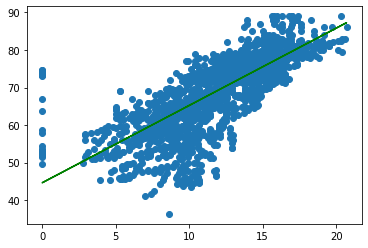

In [436]:
line= lr.coef_*X+lr.intercept_

plt.scatter(X_train,y_train)
plt.plot(X,line,color="green");
plt.show()

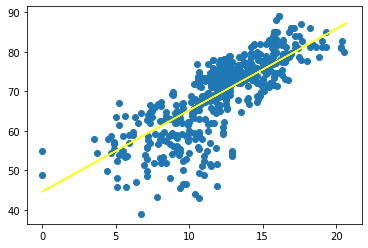

In [442]:
#plotting of testing data
plt.scatter(X_test,y_test)
plt.plot(X,line,color="yellow")
plt.show()

# Making predictions

In [443]:
y_predicted = lr.predict(X_test)

In [444]:
df4=pd.DataFrame({'Actual':y_test,'Predicted':y_predicted})

In [445]:
df4

,Actual,Predicted
457,72.1,69.137229
2757,75.1,70.168055
93,74.1,78.208493
30,73.6,66.457083
1494,62.0,64.189267
...,...,...
2717,60.0,65.220093
2319,81.7,74.291357
1949,64.6,59.653635
462,73.0,67.281744


In [446]:
lr.score(X_test,y_test)

0.6069399947307323

In [464]:
Sleep_hours=12
life=lr.predict([[Sleep_hours]])
print("No. of Sleep Hours",Sleep_hours)
print("Average Life Expectany=",life[0])

No. of Sleep Hours 12
Average Life Expectany= 69.34339445926182
